In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch
torch.manual_seed(0)

In [2]:
def clean_metadata(pd_metadata: pd.DataFrame):

    # Remove Unnamed Columns
    pd_metadata = pd_metadata[['Image Name', '15_diseases', 'Fitzpatrick']]

    # Change Column Name
    pd_metadata.rename(columns={'15_diseases': 'Diagnosis'}, inplace=True)
   
    # Remove Unlabelled FST
    pd_metadata = pd_metadata[pd_metadata['Fitzpatrick'] != 'TODO']

    # Remove Unlabelled Diagnsois
    pd_metadata.dropna(subset=['Diagnosis'], inplace=True)

    # Remove Duplicates
    pd_metadata.drop_duplicates(subset=['Image Name'], inplace=True)

    # Stratification Column
    pd_metadata['stratify_col'] = pd_metadata['Diagnosis'].astype(str) + '_' + pd_metadata['Fitzpatrick'].astype(str)

    return pd_metadata

In [3]:
path = 'dermie_images'
metadata = clean_metadata(pd.read_csv(f'{path}/Labelled_images_for_training_700_15_disease.csv'))
metadata.dtypes

Image Name      object
Diagnosis       object
Fitzpatrick     object
stratify_col    object
dtype: object

In [4]:
metadata['Fitzpatrick'].unique()

array(['I', 'IV', 'III', 'II', 'VI', 'V'], dtype=object)

In [5]:
# Count the diagnosis values
print(metadata['Diagnosis'].value_counts(dropna=False))

Diagnosis
eczema               88
acne                 71
melanoma             67
psoriasis            62
BCC                  53
SCC                  29
urticaria            17
cyst                  2
folliculitis          1
melanocytic nevus     1
Name: count, dtype: int64


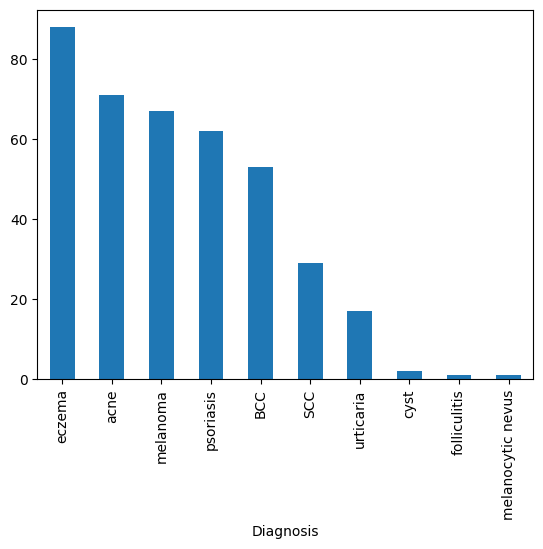

In [6]:
metadata['Diagnosis'].value_counts().plot(kind='bar')
plt.show()

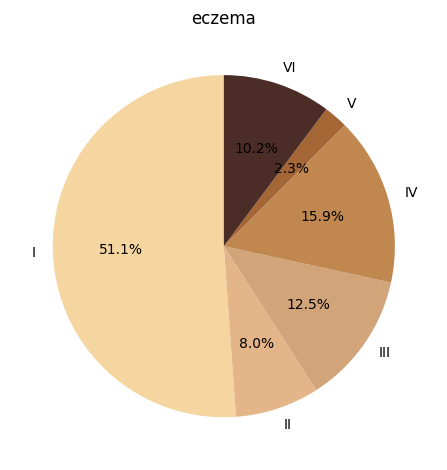

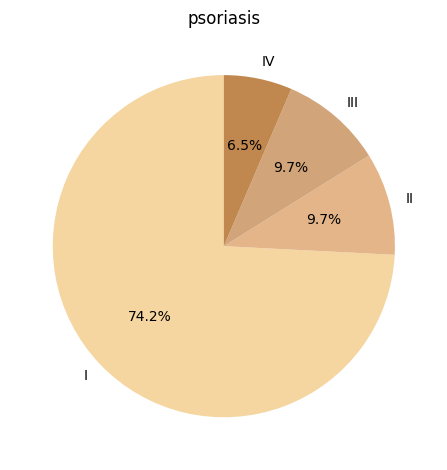

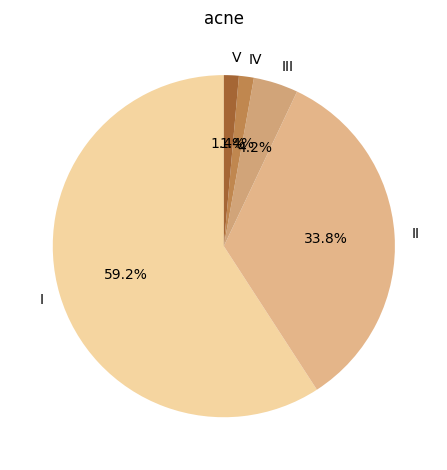

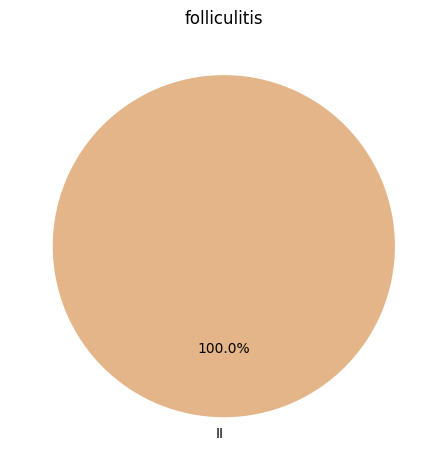

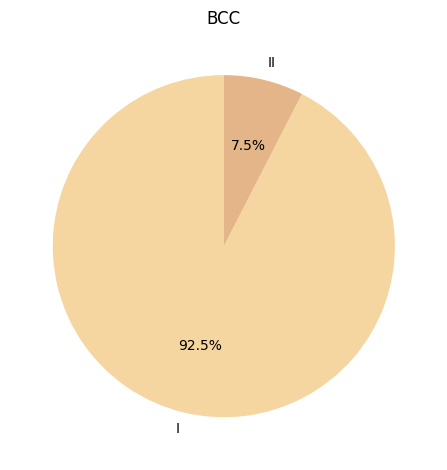

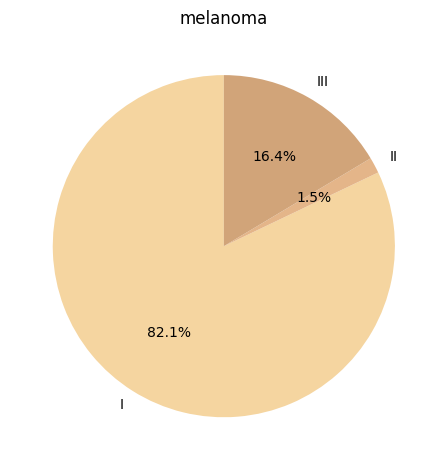

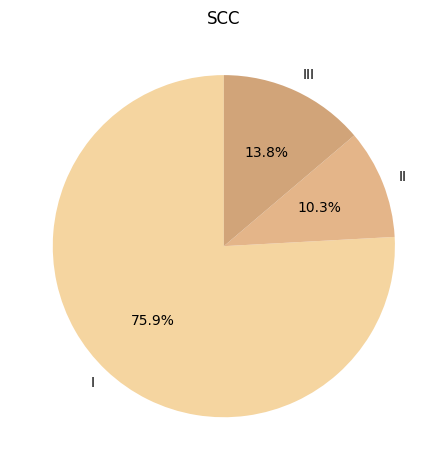

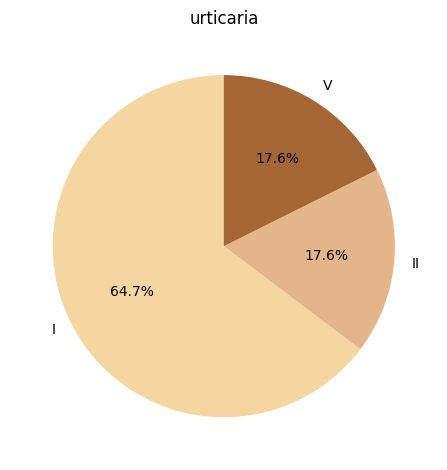

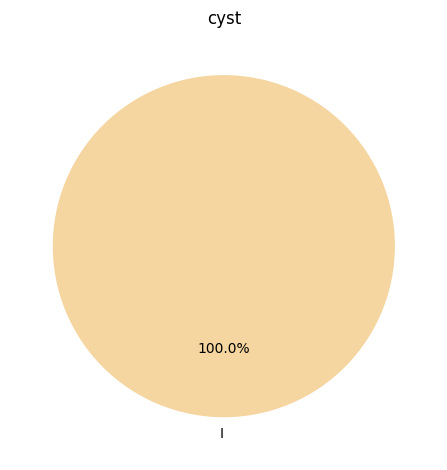

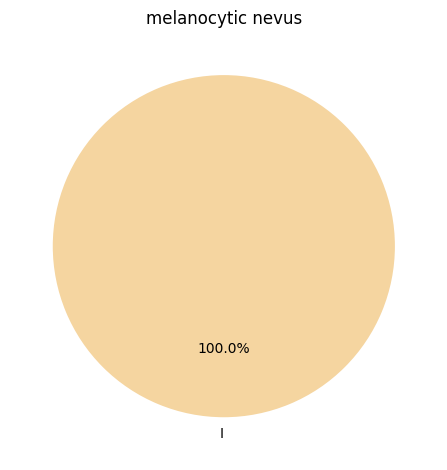

In [7]:
fst_color_map = {
    'I': '#F5D5A0',
    'II': '#E4B589',
    'III': '#D1A479',
    'IV': '#C0874F',
    'V': '#A56635',
    'VI': '#4C2C27'
}

for condition in metadata['Diagnosis'].unique():
    
    counts = metadata[metadata['Diagnosis'] == condition]['Fitzpatrick'].value_counts().sort_index()

    colors = [fst_color_map[fst] for fst in counts.index]

    counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(condition)
    plt.ylabel('')  
    plt.tight_layout()
    plt.show()